In [1]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as Color
%matplotlib inline
from astropy.utils.data import download_file
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture
import pandas as pd
import atpy
import aplpy
import montage_wrapper
from math import log10
from reproject import reproject_exact
from reproject import reproject_interp
from astropy.wcs import WCS

In the cell below I changed 'letter' to 'b'

In [3]:
letter="b"
#i = 10
#band=1
arrmgePic = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_file = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_data = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image2 = [1, 2, 3, 4]#, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
testarray = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
short_array = [1, 2, 3, 4, 5]
image_file1 = [1, 2, 3, 4, 5]
image_data1 = [1, 2, 3, 4, 5]
testarray1 = [1, 2, 3, 4, 5]
testarray2 = [1, 2, 3, 4]
image_file2 = [1, 2, 3, 4]
image_data2 = [1, 2, 3, 4]
newtestarray2MASS = [1, 2, 3]
newtestarraySDSS = [1, 2, 3, 4, 5]
newtestarrayWISE = [1, 2, 3, 4]
Length_Range_WISE = [1 ,2, 3, 4]
Length_Range_SDSS = [1, 2, 3, 4, 5]
Length_Range_2MASS = [1, 2, 3]

for i in range(10, 11): #arrmgPic:
    for bands in flat_image2:
        image_file2[bands-1] = 'wise-%i%c-%i.fits' % (i, letter, bands)
        hdu_list2 = fits.open(image_file2[bands-1])
        image_data2[bands-1] = fits.getdata(image_file2[bands-1])
        testarray2[bands-1]=image_file2[bands-1]
        newtestarrayWISE[bands-1] = image_data2[bands-1]
        Length_Range_WISE[bands-1]=len(newtestarrayWISE[bands-1])
        print(len(newtestarrayWISE[bands-1]) )
        print(newtestarrayWISE[bands-1])
    #print(image_data2[0])
    print( )

for i in range(10, 11): #arrmgePic:
    for numb in short_array:
        if numb == 1:
            color = 'u'
        elif numb == 2:
            color = 'g'
        elif numb == 3:
            color = 'r'
        elif numb == 4:
            color = 'i'
        elif numb == 5:
            color = 'z'
        image_file1[numb-1] = '%i%csdss-%c.fits' % (i, letter, color)
        hdu_list1 = fits.open(image_file1[numb-1])
        image_data1[numb-1] = fits.getdata(image_file1[numb-1])
        testarray1[numb-1] = image_file1[numb-1]
        newtestarraySDSS[numb-1] = image_data1[numb-1]
        print(image_file1[numb-1])
        Length_Range_SDSS[numb-1]=len(newtestarraySDSS[numb-1])
        print(len(newtestarraySDSS[numb-1]))
        print(newtestarraySDSS[numb-1])
    print( )

for i in range(10, 11): #arrmgPic:
    for band in flat_image:
        if band == 1:
            fill = 'h'
        elif band == 2:
            fill = 'j'
        elif band == 3:
            fill = 'k'
        image_file[band-1] = '%d%ctwomass-%c.fits' % (i, letter, fill)
        hdu_list = fits.open(image_file[band-1])
        image_data[band-1] = fits.getdata(image_file[band-1])
        testarray[band-1]=image_file[band-1]
        newtestarray2MASS[band-1] = image_data[band-1] #np.delete(testarray[band-1], [121])
        Length_Range_2MASS[band-1]=len(newtestarray2MASS[band-1])
        print(len(newtestarray2MASS[band-1]))
    print( )
       
    
    
    #cube = aplpy.make_rgb_cube([testarray1[0], testarray1[2], testarray1[1]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter))
    #cube = aplpy.make_rgb_cube([testarray[0], testarray[1], testarray[2], testarray[3]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%cPic_cube%d%c.fits' % (i, letter, i, letter))
    #cube1 = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter)
    #print(cube2)
    #RGB_Image1 = aplpy.make_rgb_image(cube1,'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill), vmin_g=None, vmax_g=None, pmin_g=100, pmax_g=101)
    #F_rgb = aplpy.FITSFigure('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c_2d.fits' % (i, letter, fill, i, letter))
    #F_rgb.show_rgb('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))
    #F_rgb.save('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))

302
[[ 4.14043093  4.13967752  4.15774393 ...,  4.13975191  4.18290758
   4.22847414]
 [ 4.13065386  4.13805246  4.15888834 ...,  4.11799097  4.15873957
   4.20476961]
 [ 4.11391878  4.12917376  4.14774561 ...,  4.10567141  4.1396699
   4.1817975 ]
 ..., 
 [ 4.80656862  4.82338381  4.74584055 ...,  4.43056726  4.433146
   4.44060755]
 [ 4.8434701   4.86390734  4.78356218 ...,  4.39282656  4.41404772
   4.4355588 ]
 [ 4.83389711  4.84978151  4.77149057 ...,  4.34314775  4.37430429
   4.40252542]]
302
[[ 10.58555031  10.56995964  10.5608902  ...,  10.54995441  10.55687332
   10.5761919 ]
 [ 10.58709145  10.56505775  10.55175781 ...,  10.54625797  10.54475594
   10.55368996]
 [ 10.5732584   10.55240345  10.54290104 ...,  10.54522896  10.53414536
   10.53138828]
 ..., 
 [ 10.75695038  10.74708939  10.70216274 ...,  10.72779846  10.73106098
   10.72345543]
 [ 10.79081059  10.7778616   10.7264328  ...,  10.69552517  10.7111454
   10.71141529]
 [ 10.806283    10.7920084   10.73991108 ...,  10

In [6]:
ls

10bsdss-g.fits
10bsdss-i.fits
10bsdss-r.fits
10bsdss-u.fits
10bsdss-z.fits
10btwomass-h.fits
10btwomass-j.fits
10btwomass-k.fits
Alex's For Vicky.ipynb
Aperture Flux vs Radius Graphs - Newest.ipynb
Colourwise Plots.ipynb
Pairwise Plots, Effective Radii, Densities and Background Levels.ipynb
initfile
wise-10b-1.fits
wise-10b-2.fits
wise-10b-3.fits
wise-10b-4.fits


18.9573861957
17.5204255438
1.43696065187


"\nThe for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.\nNot sure what sort of range to apply to these for loops\nThis code is giving an error of array indices being out of range and the for loops may be the result?\n"

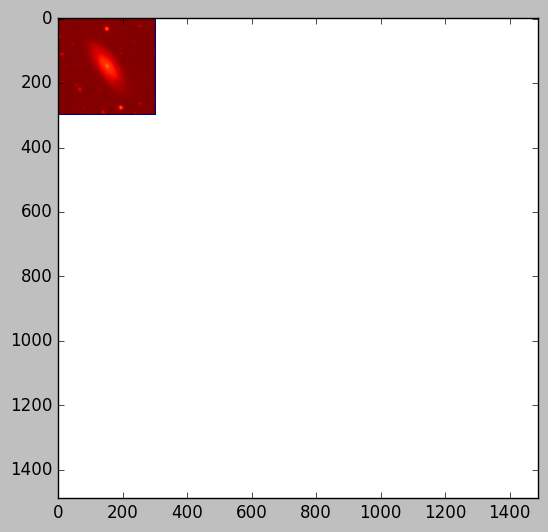

In [8]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

#print(newtestarray2[0])#[0][0])
#print(newtestarray1[1])
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))#W1-10a
        
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]      
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'
#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)
reproj1, footprint1 = reproject_interp(hduWISE, wcsSDSS, shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
for y in range(1, 230):
    for x in range(1, 230):
        if footprint1[y-1][x-1] == 0:
            break
        else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]

print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0][0])  

plt.figure(1)
plt.imshow(reproj1)

'''
The for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.
Not sure what sort of range to apply to these for loops
This code is giving an error of array indices being out of range and the for loops may be the result?
'''

Above image is what I got by running your code as is - I changed a typo in final 'else' command -- you had reproj instead of reproj1, but I didn't change anything else.

# Vicky tests start here

Spitting up your code over multiple cells so I can understand what its doing a bit easier. I find it much easier to have the code over lots of cells, then you can track down where the problem is.

In [4]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

In [5]:
def test_dim(testlist, dim=0):
### tests how many dimensions a list has
### copied from here: http://stackoverflow.com/questions/15985389/python-check-if-list-is-multidimensional-or-one-dimensional
   if isinstance(testlist, list):
      if testlist == []:
          return dim
      dim = dim + 1
      dim = test_dim(testlist[0], dim)
      return dim
   else:
      if dim == 0:
          return -1
      else:
          return dim


In [6]:
test_dim(new_image_array_WISE)

2

In [7]:
new_image_array_WISE = np.array(new_image_array_WISE)
new_image_array_WISE.shape

(302, 302)

Previously, you had defined new_image_array_WISE as a length 302 list, where each element in the list was a length 302 list. What I've just done above is convert new_image_array_WISE to a numpy array, so now it's a 302x302 array. This might make things easier. Will do the same for the other definitions...

In [8]:
new_image_array_SDSS = np.array(new_image_array_SDSS)
new_image_array_COMBINE = np.array(new_image_array_COMBINE)

In [9]:
#print(newtestarray2[0])#[0][0])
#print(newtestarray1[1])
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))#W1-10a
        
## This still works because the indexing is still the same even though the arrays have been converted. But they'll be easier to work with later on.

In [10]:
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]      
        
        

In [11]:
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])

In [44]:
hdulistWISE

In [12]:
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)

The important step to take now is to check if these files contain what you expect. Display the images and print out the headers. Is this what you expect to see?

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  302                                                  
NAXIS2  =                  302                                                  
EXTEND  =                    T                                                  

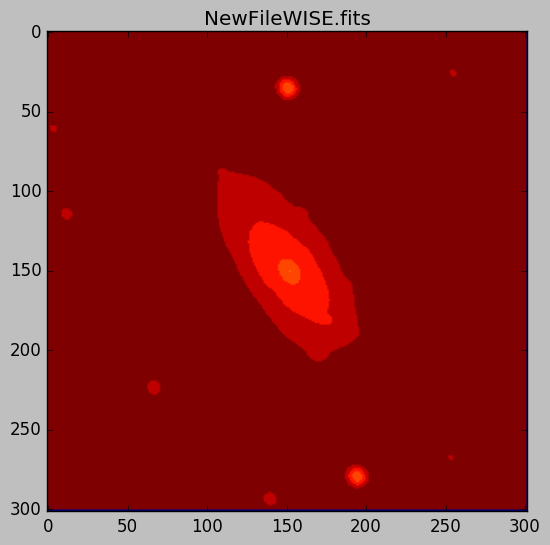

In [13]:
plt.figure(1)
plt.imshow(hdulistWISE[0].data)
plt.title('NewFileWISE.fits')

hdulistWISE[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1489                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T                                                  

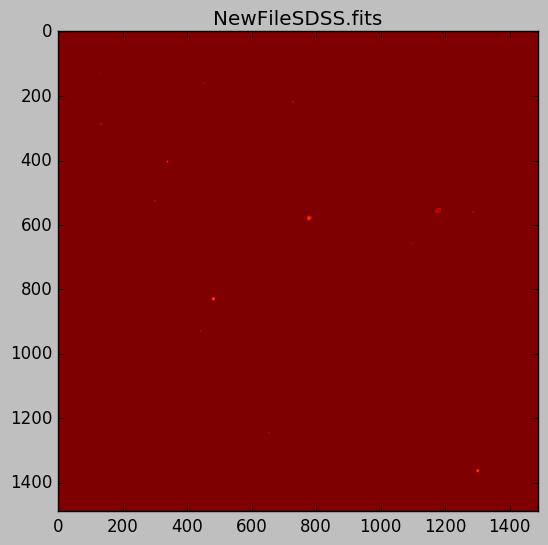

In [14]:
plt.figure(1)
plt.imshow(hdulistSDSS[0].data)
plt.title('NewFileSDSS.fits')

hdulistSDSS[0].header

In [15]:
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'

#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)

In [16]:
image_overlap_dataWISE = np.array(image_overlap_dataWISE)
shapeWISE = image_overlap_dataWISE.shape
shapeWISE

(302, 302)

In [17]:
image_overlap_dataSDSS = np.array(image_overlap_dataSDSS)
shapeSDSS = image_overlap_dataSDSS.shape
shapeSDSS


(1489, 1489)

This is like what was happening before. There's just one extra step to convert the data from a list of lists (hard to work with) to an array, so when you call attributes like shape you get what you expect returned. Then if you want something like the length along one axis, you can call shapeWISE[0]

In [18]:
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)

In [19]:
print 'wcsWISE'
print wcsWISE
print '\n'
print 'wcsSDSS'
print wcsSDSS

wcsWISE
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 302 302


wcsSDSS
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 1489 1489


18
17
1


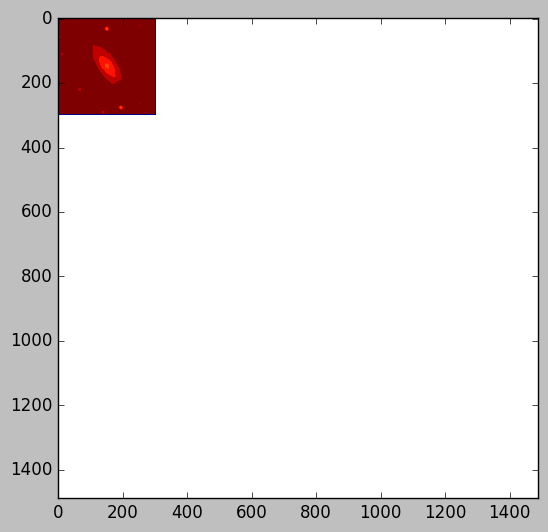

In [20]:
reproj1, footprint1 = reproject_interp(hduWISE, wcsSDSS, shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
for y in range(1, 230):
    for x in range(1, 230):
        if footprint1[y-1][x-1] == 0:
            break
        else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]

print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0][0])  

plt.figure(1)
plt.imshow(reproj1)



So now this plot makes a lot more sense! Because both of your new images - NewFileWISE.fits and NewFileSDSS.fits - are missing all the WCS information from the header, the reproj code sets all the parameters to the default values. This means it thinks there isn't any reprojecting to do because the images are already in the same system. 

### Suggestions for next steps

There's a key point early on in your code that results in the images not having WCS information in the header. If you solve that issue, your code will work. I'm not going to tell you exactly what to do because you can absolutely get it yourself, we just need to simplify the code a little bit (and that's a good thing).

1. Try to break up your code into steps, like I have here, to find where the problem is and see if you could simplify what's going on at that stage. What are you doing to the images there? It's easier to get one thing working then to add a step than to try to add all the things at once.

2. Check what's actually in your variables, arrays, images, headers, etc at each stage too. Again, this is easier if you break it up into chunks. It's totally OK to have one line of code in a cell. Here's an example of some (what I thought initially would be simple) code that took me a looooong time to debug: https://github.com/vickyscowcroft/ipython_notebooks/blob/master/simple_rrlyrae_lightcurves.ipynb If you look at the first 12 cells, I keep printing the same table and the length of the arrays out. That was because I was trying to match some tables using the name of the stars, but the capital letters were messing everything up. It took literally days to fix, but the only way I could see what was going on was looking at what was in the tables to see if they were what I thought they should be. 

3. Comment your code! It will be really helpful to you later on if you write now what you think it should do, what it actually does, and why you think it might not be doing what you think. Even something you think is super obvious now will not be in a weeks time. LEARN FROM MY MISFORTUNE.